# Starting off

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./all/train.csv')
test = pd.read_csv('./all/test.csv')
Id = test.iloc[:, 0]

In [4]:
trainc = train.columns[train.isnull().any()] # Null columns in train data
testc = test.columns[test.isnull().any()]    # Null columns in test data 
totc = train.columns                         # Total columns

In [5]:
# Keeping features which don't have missing values in test data
keep_feats = [x for x in totc if x not in testc]

I dont want to do any assumption of missing values in test data

In [6]:
train_data = train.loc[:, keep_feats]

## Label encoding and handling missing values in train_data 

Note that test doesn't have any

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer   # Kaam hi nahi pada :p

In [8]:
train_data.columns[train_data.isnull().any()]

Index(['Electrical'], dtype='object')

Here seems tht in train data only electrical as NaN values so it won't harm much if I remove it from both train and test data
Heheh so missing values handled ^_^

In [9]:
keep_feats.remove('Electrical')

As of now I'm removing all the columns containing date, year or month. Will derive features in later attempt

In [61]:
# rem = ['YearBuilt','YearRemodAdd', 'YrSold']
# for x in rem:
#     keep_feats.remove(x)

On removing these the test set had public score of 0.14646 
<br>
While keeping got me the score of 0.14381, so obvio gonna keep 'em

In [10]:
len(keep_feats)

47

In [14]:
train_data = train.loc[:, keep_feats]
test_data = test.loc[:, keep_feats[:-1]]

Finding non-numeric data to encode

In [15]:
enc = []
for types in train_data.dtypes.iteritems():
    if not str(types[1]) == 'int64': 
        enc.append(types[0])

Encoding features in both train and test data

In [16]:
train_data.loc[:, enc] = train_data.loc[:, enc].apply(LabelEncoder().fit_transform)
test_data.loc[:, enc] = test_data.loc[:, enc].apply(LabelEncoder().fit_transform)

## Training models 

In [17]:
from sklearn.model_selection import train_test_split
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1, max_depth=15)
# Try out some hyperparams yourself!

rf.fit(X_train, y_train)

print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9696112792214757
0.8877268449312671


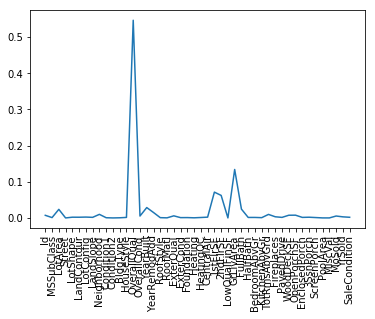

In [20]:
plt.plot(rf.feature_importances_)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=90);

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

print(gb.score(X_train, y_train))
print(gb.score(X_test, y_test))

0.9517960481173506
0.9050770833101689


Trying some other models too

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb.score(X_test, y_test) # LOL

0.00821917808219178

In [25]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(170, 80, 70, 60, 50, 10, 5), learning_rate='invscaling').fit(X_train, y_train)
mlp.score(X_test, y_test)

0.6816700847428852

        Outputting values for submission

In [72]:
gb.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
predictions = pd.DataFrame(gb.predict(test_data), Id.values)
predictions.to_csv('n4.csv', header=['SalePrice'])

## Let's check out some correlation

In [29]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);

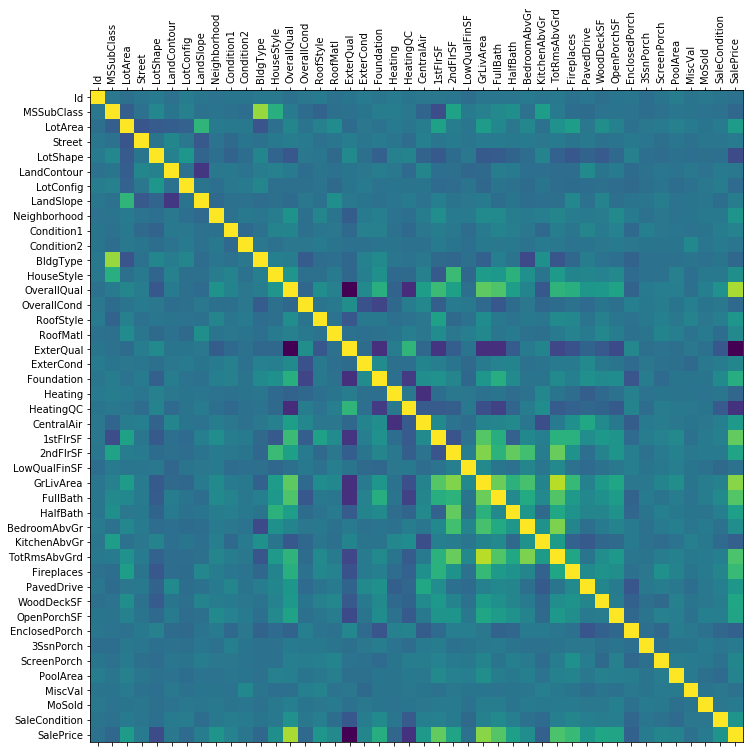

In [34]:
plot_corr(train_data, 12)

In [26]:
# Hand-picked Values lol
qds = ['OverallQual', '1stFlrSF', 'GrLivArea', 'FullBath']
X_new = X.copy()

In [27]:
for feat in qds: 
    X_new[feat + 'Quad'] = X_new[feat] ** 2

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

print(gb.score(X_train, y_train))
print(gb.score(X_test, y_test))

0.9529489747459029
0.8932380626062817


In [30]:
test_data_new = test_data.copy()
for feat in qds: 
    test_data_new[feat + 'Quad'] = test_data_new[feat] ** 2

In [31]:
gb.fit(X_new, y)
predictions = pd.DataFrame(gb.predict(test_data_new), Id.values)
predictions.to_csv('n5.csv', header=['SalePrice'])

Score for above was 0.14425

So this was my first ever kaggle competition and at this moment of time I'm in top 46%. <br>
Will be he